## 便利店销量预测

这是[便利店销量预测比赛](https://www.kaggle.com/c/rossmann-store-sales)的一个使用 XGBoost 的简单尝试参考。

得分 ： 

Private Score 
0.12449

Public Score
0.11235

<h1 class="page-name">
    Forecast sales using store, promotion, and competitor data
</h1>


<p>Rossmann operates over 3,000 drug stores in 7 European countries. Currently, <br />Rossmann store managers are tasked with predicting their daily sales for up to six weeks in advance. Store sales are influenced by many factors, including promotions, competition, school and state holidays, seasonality, and locality. With thousands of individual managers predicting sales based on their unique circumstances, the accuracy of results can be quite varied.</p>
<p><span style="font-size: 1em; line-height: 1.5em;">In their first Kaggle competition, Rossmann is challenging you to predict 6 weeks of daily sales for 1,115 stores located across Germany. Reliable sales forecasts enable store managers to create effective staff schedules that increase productivity and motivation. By helping Rossmann create a robust prediction model, you will help store managers stay focused on what’s most important to them: their customers and their teams! </span></p>
<p><span style="font-size: 1em; line-height: 1.5em;"> <img src="https://kaggle2.blob.core.windows.net/competitions/kaggle/4594/media/rossmann_banner2.png" alt="" height="81" width="640" /><br /></span></p>
<p><em><span style="font-size: 1em; line-height: 1.5em;">If you are interested in joining Rossmann at their headquarters near Hanover, Germany, please contact Mr. Frank König (Frank.Koenig {at} rossmann.de) Rossmann is currently recruiting data scientists at <a href="http://www.rossmann.de/unternehmen/karriere/stellenboerse/stellenanzeigen~jid=3A5205E3-C4F9-4F5D-AA93-438D0B064D70~">senior</a> and <a href="http://www.rossmann.de/unternehmen/karriere/stellenboerse/stellenanzeigen~jid=F5142F37-C823-4767-B7CF-21DE3B351D66~">entry-level</a> positions.</span></em></p>


## 数据

<table id="data-files" class="nicetable full roomy align-top border">   
<thead>
    <tr>
        <th colspan="2">File Name</th> 
        <th>Available Formats</th>         
    </tr> 
</thead>

    <tbody  >
        <tr>

            <td class="file-name" colspan="2" rowspan="1">sample_submission.csv</td>
            <td>
<a href="/c/rossmann-store-sales/download/sample_submission.csv.zip" name="sample_submission.csv.zip" onclick="window.Intercom(&#39;trackEvent&#39;,&#39;download_compdata&#39;,{&#39;comp_id&#39;: 4594});">.zip (55.25 kb)</a>                    </td>
        </tr>

    </tbody>
    <tbody  >
        <tr>

            <td class="file-name" colspan="2" rowspan="1">store.csv</td>
            <td>
<a href="/c/rossmann-store-sales/download/store.csv.zip" name="store.csv.zip" onclick="window.Intercom(&#39;trackEvent&#39;,&#39;download_compdata&#39;,{&#39;comp_id&#39;: 4594});">.zip (8.33 kb)</a>                    </td>
        </tr>

    </tbody>
    <tbody  >
        <tr>

            <td class="file-name" colspan="2" rowspan="1">test.csv</td>
            <td>
<a href="/c/rossmann-store-sales/download/test.csv.zip" name="test.csv.zip" onclick="window.Intercom(&#39;trackEvent&#39;,&#39;download_compdata&#39;,{&#39;comp_id&#39;: 4594});">.zip (143.25 kb)</a>                    </td>
        </tr>

    </tbody>
    <tbody  >
        <tr>

            <td class="file-name" colspan="2" rowspan="1">train.csv</td>
            <td>
<a href="/c/rossmann-store-sales/download/train.csv.zip" name="train.csv.zip" onclick="window.Intercom(&#39;trackEvent&#39;,&#39;download_compdata&#39;,{&#39;comp_id&#39;: 4594});">.zip (5.66 mb)</a>                    </td>
        </tr>

    </tbody>
</table>

<p>You are provided with historical sales data for 1,115 Rossmann stores. The task is to forecast the "Sales" column for the test set. Note that some stores in the dataset were temporarily closed for refurbishment.</p>

###  Files
<ul>
<li><strong>train.csv</strong> - historical data including Sales</li>
<li><strong>test.csv</strong> - historical data excluding Sales</li>
<li><strong>sample_submission.csv</strong> - a sample submission file in the correct format</li>
<li><strong>store.csv</strong> - supplemental information about the stores</li>
</ul>

### Data fields

<p>Most of the fields are self-explanatory. The following are descriptions for those that aren't.</p>
<ul>
<li><strong>Id</strong> - an Id that represents a (Store, Date) duple within the test set</li>
<li><strong>Store</strong> - a unique Id for each store</li>
<li><strong>Sales</strong> - the turnover for any given day (this is what you are predicting)</li>
<li><strong>Customers</strong> - the number of customers on a given day</li>
<li><strong>Open</strong> - an indicator for whether the store was open: 0 = closed, 1 = open</li>
<li><strong>StateHoliday</strong> - indicates a state holiday. Normally all stores, with few exceptions, are closed on state holidays. Note that all schools are closed on public holidays and weekends. a = public holiday, b = Easter holiday, c = Christmas, 0 = None</li>
<li><strong>SchoolHoliday</strong> - indicates if the (Store, Date) was affected by the closure of public schools</li>
<li><strong>StoreType</strong> - differentiates between 4 different store models: a, b, c, d</li>
<li><strong>Assortment</strong> - describes an assortment level: a = basic, b = extra, c = extended</li>
<li><strong>CompetitionDistance</strong> - distance in meters to the nearest competitor store</li>
<li><strong>CompetitionOpenSince[Month/Year]</strong> - gives the approximate year and month of the time the nearest competitor was opened</li>
<li><strong>Promo</strong> - indicates whether a store is running a promo on that day</li>
<li><strong>Promo2</strong> - Promo2 is a continuing and consecutive promotion for some stores: 0 = store is not participating, 1 = store is participating</li>
<li><strong>Promo2Since[Year/Week]</strong> - describes the year and calendar week when the store started participating in Promo2</li>
<li><strong>PromoInterval</strong> - describes the consecutive intervals Promo2 is started, naming the months the promotion is started anew. E.g. "Feb,May,Aug,Nov" means each round starts in February, May, August, November of any given year for that store</li>
</ul>

## 引入所需的库

In [15]:
import pandas as pd
import datetime
import csv
import numpy as np
import os
import scipy as sp
import xgboost as xgb
import itertools
import operator
import warnings
warnings.filterwarnings("ignore")

In [1]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.base import TransformerMixin
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from matplotlib import pylab as plt
plot = True

goal = 'Sales'
myid = 'Id'

## 定义一些变换和判准则

https://www.kaggle.com/c/rossmann-store-sales/overview/evaluation

由于赛题的评估函数是Root Mean Square Percentage Error (RMSPE)，这个评估函数会对一些特别高的销量数据的实际值和预测值的代价进行一定的优化。比如销量 1500 预测 1495 ，销量15 预测 10，这两个情况是不一样的。

In [33]:
def ToWeight(y):
    w = np.zeros(y.shape, dtype=float)
    ind = y !=0
    # 非0数据的平方的倒数
    w[ind] =  1./(y[ind]**2)
    return w

def rmspe(yhat, y):
    """
    评估函数
    """
    w = ToWeight(y)
    rmspe = np.sqrt(np.mean(w * (y - yhat)**2))
    return rmspe


def rmspe_xg(yhat, y):
    """
    自定义 xgboost 评估函数，只在评估时使用，训练时不适使用。
    需要训练时使用的话，要提供一阶导数和二阶导数，这里不方便
    
    这里评估的时候用了 np.exp 是因为我们在后面训练的时候打算对销量做 log 变化，防止一些销量特别高的数据的影响
    """
    y = y.get_label()
    y = np.exp(y) - 1
    yhat = np.exp(yhat) -1
    w = ToWeight(y)
    rmspe = np.sqrt(np.mean(w * (y - yhat)**2))
    return "rmspe", rmspe

In [6]:
store = pd.read_csv('../../data/rossmann_store_sales/store.csv')

In [7]:
store.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [8]:
train_df = pd.read_csv('../../data/rossmann_store_sales/train.csv')

In [9]:
train_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [10]:
test_df = pd.read_csv('../../data/rossmann_store_sales/test.csv')

In [11]:
test_df.head()

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0
2,3,7,4,2015-09-17,1.0,1,0,0
3,4,8,4,2015-09-17,1.0,1,0,0
4,5,9,4,2015-09-17,1.0,1,0,0


## 加载数据

In [13]:
def load_data():
    """
    加载数据，设定数值型和非数值型数据
    """
    store = pd.read_csv('../../data/rossmann_store_sales/store.csv')
    train_org = pd.read_csv('../../data/rossmann_store_sales/train.csv',dtype={'StateHoliday':pd.np.string_})
    test_org = pd.read_csv('../../data/rossmann_store_sales/test.csv',dtype={'StateHoliday':pd.np.string_})
    train = pd.merge(train_org, store, on='Store', how='left') 
    test = pd.merge(test_org, store, on='Store', how='left') 
    features = test.columns.tolist()
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    features_numeric = test.select_dtypes(include=numerics).columns.tolist()
    features_none_numeric = [f for f in features if f not in features_numeric]
    return (train, test, features, features_none_numeric)

## 数据与特征处理

In [34]:
def process_data(train, test, features, features_non_numeric):
    """
    特征工程与特征选择
    """
    train = train[train['Sales'] > 0]
    
    for data in [train, test]:
        # 时间特征 这里可以直接用 to_datetime 方便处理
        data['year'] = data.Date.apply(lambda x: x.split('-')[0])
        data['year'] = data['year'].astype(float)
        data['month'] = data.Date.apply(lambda x: x.split('-')[1])
        data['month'] = data['month'].astype(float)
        data['day'] = data.Date.apply(lambda x: x.split('-')[2])
        data['day'] = data['day'].astype(float)
        
        # 特定的促销月份
        data['promojan'] = data.PromoInterval.apply(lambda x: 0 if isinstance(x, float) else 1 if "Jan" in x else 0)
        data['promofeb'] = data.PromoInterval.apply(lambda x: 0 if isinstance(x, float) else 1 if "Feb" in x else 0)
        data['promomar'] = data.PromoInterval.apply(lambda x: 0 if isinstance(x, float) else 1 if "Mar" in x else 0)
        data['promoapr'] = data.PromoInterval.apply(lambda x: 0 if isinstance(x, float) else 1 if "Apr" in x else 0)
        data['promomay'] = data.PromoInterval.apply(lambda x: 0 if isinstance(x, float) else 1 if "May" in x else 0)
        data['promojun'] = data.PromoInterval.apply(lambda x: 0 if isinstance(x, float) else 1 if "Jun" in x else 0)
        data['promojul'] = data.PromoInterval.apply(lambda x: 0 if isinstance(x, float) else 1 if "Jul" in x else 0)
        data['promoaug'] = data.PromoInterval.apply(lambda x: 0 if isinstance(x, float) else 1 if "Aug" in x else 0)
        data['promosep'] = data.PromoInterval.apply(lambda x: 0 if isinstance(x, float) else 1 if "Sep" in x else 0)
        data['promooct'] = data.PromoInterval.apply(lambda x: 0 if isinstance(x, float) else 1 if "Oct" in x else 0)
        data['promonov'] = data.PromoInterval.apply(lambda x: 0 if isinstance(x, float) else 1 if "Nov" in x else 0)
        data['promodec'] = data.PromoInterval.apply(lambda x: 0 if isinstance(x, float) else 1 if "Dec" in x else 0)
        
        
    # 特征集合
    noisy_features = [myid, 'Date']
    features = [c for c in features if c not in noisy_features]
    features_non_numeric = [c for c in features_non_numeric if c not in noisy_features]
    features.extend(['year', 'month', 'day'])
    
    # 缺失值填充
    # 继承TransformerMixin
    class DataFrameImputer(TransformerMixin):
        # http://stackoverflow.com/questions/25239958/impute-categorical-missing-values-in-scikit-learn
        def __init__(self):
            """Impute missing values.
            Columns of dtype object are imputed with the most frequent value
            in column.
            Columns of other types are imputed with mean of column.
            """
        def fit(self, X, y=None):
            self.fill = pd.Series([X[c].value_counts().index[0] # mode
                if X[c].dtype == np.dtype('O') else X[c].mean() for c in X], # mean
                index=X.columns)
            return self
        def transform(self, X, y=None):
            return X.fillna(self.fill)
        
    train = DataFrameImputer().fit_transform(train)
    test = DataFrameImputer().fit_transform(test)
    
    # 预处理非数值型特征
    le = LabelEncoder()
    for col in features_non_numeric:
        # 训练集和测试集一起处理
        le.fit(list(train[col])+list(test[col]))
        train[col] = le.transform(train[col])
        test[col] = le.transform(test[col])
    # LR和神经网络这种模型都对输入数据的幅度极度敏感，请先做归一化操作
    scaler = StandardScaler()
    for col in set(features) - set(features_non_numeric) - \
      set([]): # TODO: add what not to scale
        scaler.fit(np.array(list(train[col])+list(test[col])).reshape(-1,1))
        train[col] = scaler.transform(np.array(train[col]).reshape(-1,1))
        test[col] = scaler.transform(np.array(test[col]).reshape(-1,1))
    return (train,test, features, features_non_numeric)

## 训练与分析

In [52]:
def XGB_native(train, test, features, features_non_numeric):
    depth = 13
    eta = 0.01 
    ntrees = 5000
    mcw = 3
    parms = {"objective": "reg:linear",
            "booster": "gbtree",
            "eta": eta,
            "max_depth": depth,
            "min_child_weigh": mcw,
            "subsample": 0.9,
            "colsample_bytree": 0.7,
            "silent": 1}
    print("Running with parms:" + str(parms))
    print("Running with ntrees: " + str(ntrees))
    print("Running with features: " + str(features))
    
    # 训练模型
    tsize = 0.05
    X_train, X_test = train_test_split(train, test_size=tsize)
    # log 变换后进行训练，数据特别大的情况
    dtrain = xgb.DMatrix(X_train[features], np.log(X_train[goal] + 1))
    dvalid = xgb.DMatrix(X_test[features], np.log(X_test[goal] + 1))
    watchlist = [(dvalid, 'eval'), (dtrain, 'train')]
    gbm = xgb.train(parms, dtrain, ntrees, evals=watchlist, early_stopping_rounds=100,feval=rmspe_xg, verbose_eval=True)
    # 预测结果
    train_probs = gbm.predict(xgb.DMatrix(X_test[features]))
    # 销量不为0 以下
    indices = train_probs < 0
    train_probs[indices] = 0
    error = rmspe(np.exp(train_probs) - 1, X_test[goal].values)
    print(error)
    
    # 预测和输出
    test_probs = gbm.predict(xgb.DMatrix(test[features]))
    indices = test_probs < 0
    test_probs[indices] = 0
    submission = pd.DataFrame({myid: test[myid], goal: np.exp(test_probs) -1})
    if not os.path.exists('result/'):
        os.mkdir('result/')
    submission.to_csv("./result/dat-xgb_d%s_eta%s_ntree%s_mcw%s_tsize%s.csv" % (str(depth),str(eta),str(ntrees),str(mcw),str(tsize)) , index=False)
    
    # 特征重要性
    if plot:
        outfile = open('xgb.fmap', 'w')
        i = 0
        for feat in features:
          outfile.write('{0}\t{1}\tq\n'.format(i, feat))
          i = i + 1
        outfile.close()
        importance = gbm.get_fscore(fmap='xgb.fmap')
        importance = sorted(importance.items(), key=operator.itemgetter(1))
        df = pd.DataFrame(importance, columns=['feature', 'fscore'])
        df['fscore'] = df['fscore'] / df['fscore'].sum()
        # Plotitup
        plt.figure()
        df.plot()
        df.plot(kind='barh', x='feature', y='fscore', legend=False, figsize=(25, 15))
        plt.title('XGBoost Feature Importance')
        plt.xlabel('relative importance')
        plt.gcf().savefig('Feature_Importance_xgb_d%s_eta%s_ntree%s_mcw%s_tsize%s.png' % (str(depth),str(eta),str(ntrees),str(mcw),str(tsize)))

In [36]:
print("=> 载入数据中...")
train,test,features,features_non_numeric = load_data()

=> 载入数据中...


In [37]:
print("=> 处理数据与特征工程...")
train,test,features,features_non_numeric = process_data(train,test,features,features_non_numeric)

=> 处理数据与特征工程...


=> 使用XGBoost建模...
Running with parms:{'objective': 'reg:linear', 'booster': 'gbtree', 'eta': 0.01, 'max_depth': 13, 'min_child_weigh': 3, 'subsample': 0.9, 'colsample_bytree': 0.7, 'silent': 1}
Running with ntrees: 5000
Running with features: ['Store', 'DayOfWeek', 'Open', 'Promo', 'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment', 'CompetitionDistance', 'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval', 'year', 'month', 'day']
[0]	eval-rmse:8.18483	train-rmse:8.18619	eval-rmspe:0.999863	train-rmspe:0.999864
Multiple eval metrics have been passed: 'train-rmspe' will be used for early stopping.

Will train until train-rmspe hasn't improved in 100 rounds.
[1]	eval-rmse:8.10313	train-rmse:8.1045	eval-rmspe:0.999837	train-rmspe:0.999838
[2]	eval-rmse:8.02226	train-rmse:8.02363	eval-rmspe:0.999809	train-rmspe:0.99981
[3]	eval-rmse:7.94218	train-rmse:7.94353	eval-rmspe:0.999779	train-rmspe:0.99978
[4]	eval-rmse:7

[92]	eval-rmse:3.25852	train-rmse:3.25929	eval-rmspe:0.959186	train-rmspe:0.959257
[93]	eval-rmse:3.22618	train-rmse:3.22694	eval-rmspe:0.957848	train-rmspe:0.957922
[94]	eval-rmse:3.19414	train-rmse:3.19491	eval-rmspe:0.956484	train-rmspe:0.95656
[95]	eval-rmse:3.16244	train-rmse:3.1632	eval-rmspe:0.955089	train-rmspe:0.955168
[96]	eval-rmse:3.13107	train-rmse:3.13184	eval-rmspe:0.953658	train-rmspe:0.953741
[97]	eval-rmse:3.10001	train-rmse:3.10076	eval-rmspe:0.952203	train-rmspe:0.952287
[98]	eval-rmse:3.06924	train-rmse:3.07	eval-rmspe:0.950719	train-rmspe:0.950807
[99]	eval-rmse:3.0388	train-rmse:3.03954	eval-rmspe:0.949205	train-rmspe:0.949295
[100]	eval-rmse:3.00866	train-rmse:3.0094	eval-rmspe:0.947656	train-rmspe:0.94775
[101]	eval-rmse:2.97883	train-rmse:2.97956	eval-rmspe:0.946081	train-rmspe:0.946178
[102]	eval-rmse:2.94928	train-rmse:2.94999	eval-rmspe:0.94448	train-rmspe:0.944579
[103]	eval-rmse:2.92005	train-rmse:2.92075	eval-rmspe:0.94284	train-rmspe:0.942943
[104]	eval

[191]	eval-rmse:1.22565	train-rmse:1.22595	eval-rmspe:0.694166	train-rmspe:0.695439
[192]	eval-rmse:1.21378	train-rmse:1.21407	eval-rmspe:0.690592	train-rmspe:0.691896
[193]	eval-rmse:1.20203	train-rmse:1.20231	eval-rmspe:0.687014	train-rmspe:0.68835
[194]	eval-rmse:1.19042	train-rmse:1.19068	eval-rmspe:0.683434	train-rmspe:0.684802
[195]	eval-rmse:1.17891	train-rmse:1.17916	eval-rmspe:0.67985	train-rmspe:0.681248
[196]	eval-rmse:1.16755	train-rmse:1.16779	eval-rmspe:0.676256	train-rmspe:0.677687
[197]	eval-rmse:1.15634	train-rmse:1.15657	eval-rmspe:0.672655	train-rmspe:0.674117
[198]	eval-rmse:1.14521	train-rmse:1.14543	eval-rmspe:0.669057	train-rmspe:0.670557
[199]	eval-rmse:1.13417	train-rmse:1.13439	eval-rmspe:0.665458	train-rmspe:0.666994
[200]	eval-rmse:1.12326	train-rmse:1.12347	eval-rmspe:0.661862	train-rmspe:0.663433
[201]	eval-rmse:1.11246	train-rmse:1.11265	eval-rmspe:0.658264	train-rmspe:0.659873
[202]	eval-rmse:1.10175	train-rmse:1.10194	eval-rmspe:0.654662	train-rmspe:0.6

[288]	eval-rmse:0.499767	train-rmse:0.49916	eval-rmspe:0.380396	train-rmspe:0.384961
[289]	eval-rmse:0.495598	train-rmse:0.494979	eval-rmspe:0.377933	train-rmspe:0.382558
[290]	eval-rmse:0.49144	train-rmse:0.490809	eval-rmspe:0.375472	train-rmspe:0.380129
[291]	eval-rmse:0.487361	train-rmse:0.486719	eval-rmspe:0.373048	train-rmspe:0.377765
[292]	eval-rmse:0.483188	train-rmse:0.482531	eval-rmspe:0.370591	train-rmspe:0.375378
[293]	eval-rmse:0.47919	train-rmse:0.478517	eval-rmspe:0.368203	train-rmspe:0.372914
[294]	eval-rmse:0.475188	train-rmse:0.474502	eval-rmspe:0.365818	train-rmspe:0.370594
[295]	eval-rmse:0.471239	train-rmse:0.470531	eval-rmspe:0.363463	train-rmspe:0.368165
[296]	eval-rmse:0.467345	train-rmse:0.46662	eval-rmspe:0.361123	train-rmspe:0.365767
[297]	eval-rmse:0.463519	train-rmse:0.462774	eval-rmspe:0.358817	train-rmspe:0.363398
[298]	eval-rmse:0.459734	train-rmse:0.45897	eval-rmspe:0.356528	train-rmspe:0.361165
[299]	eval-rmse:0.455976	train-rmse:0.45519	eval-rmspe:0.35

[384]	eval-rmse:0.25457	train-rmse:0.252066	eval-rmspe:0.227113	train-rmspe:0.234621
[385]	eval-rmse:0.253007	train-rmse:0.250484	eval-rmspe:0.226113	train-rmspe:0.233645
[386]	eval-rmse:0.251665	train-rmse:0.249125	eval-rmspe:0.225281	train-rmspe:0.232854
[387]	eval-rmse:0.250407	train-rmse:0.247851	eval-rmspe:0.224515	train-rmspe:0.232141
[388]	eval-rmse:0.249052	train-rmse:0.246477	eval-rmspe:0.223677	train-rmspe:0.231348
[389]	eval-rmse:0.24786	train-rmse:0.245253	eval-rmspe:0.222954	train-rmspe:0.230542
[390]	eval-rmse:0.246564	train-rmse:0.243931	eval-rmspe:0.222155	train-rmspe:0.22976
[391]	eval-rmse:0.245364	train-rmse:0.242705	eval-rmspe:0.221396	train-rmspe:0.22895
[392]	eval-rmse:0.244174	train-rmse:0.241492	eval-rmspe:0.220671	train-rmspe:0.22826
[393]	eval-rmse:0.243028	train-rmse:0.24032	eval-rmspe:0.21996	train-rmspe:0.227077
[394]	eval-rmse:0.2419	train-rmse:0.239165	eval-rmspe:0.219286	train-rmspe:0.226275
[395]	eval-rmse:0.240693	train-rmse:0.237929	eval-rmspe:0.21854

[480]	eval-rmse:0.181878	train-rmse:0.177399	eval-rmspe:0.185195	train-rmspe:0.19097
[481]	eval-rmse:0.181417	train-rmse:0.176932	eval-rmspe:0.184909	train-rmspe:0.190706
[482]	eval-rmse:0.181084	train-rmse:0.176585	eval-rmspe:0.184766	train-rmspe:0.190165
[483]	eval-rmse:0.180709	train-rmse:0.176189	eval-rmspe:0.184578	train-rmspe:0.189966
[484]	eval-rmse:0.180361	train-rmse:0.175825	eval-rmspe:0.184409	train-rmspe:0.189815
[485]	eval-rmse:0.179855	train-rmse:0.175314	eval-rmspe:0.184092	train-rmspe:0.189556
[486]	eval-rmse:0.179544	train-rmse:0.174982	eval-rmspe:0.183927	train-rmspe:0.18942
[487]	eval-rmse:0.179171	train-rmse:0.174601	eval-rmspe:0.183731	train-rmspe:0.189236
[488]	eval-rmse:0.178654	train-rmse:0.174072	eval-rmspe:0.183405	train-rmspe:0.188936
[489]	eval-rmse:0.178365	train-rmse:0.173754	eval-rmspe:0.183274	train-rmspe:0.188783
[490]	eval-rmse:0.178062	train-rmse:0.173445	eval-rmspe:0.183136	train-rmspe:0.188664
[491]	eval-rmse:0.177734	train-rmse:0.173089	eval-rmspe:

[576]	eval-rmse:0.156593	train-rmse:0.150822	eval-rmspe:0.170721	train-rmspe:0.174775
[577]	eval-rmse:0.156469	train-rmse:0.150683	eval-rmspe:0.170647	train-rmspe:0.17449
[578]	eval-rmse:0.156379	train-rmse:0.15058	eval-rmspe:0.170612	train-rmspe:0.174431
[579]	eval-rmse:0.156289	train-rmse:0.150483	eval-rmspe:0.17057	train-rmspe:0.174404
[580]	eval-rmse:0.156176	train-rmse:0.150353	eval-rmspe:0.170493	train-rmspe:0.174326
[581]	eval-rmse:0.155894	train-rmse:0.150069	eval-rmspe:0.170269	train-rmspe:0.174128
[582]	eval-rmse:0.1556	train-rmse:0.149767	eval-rmspe:0.170034	train-rmspe:0.173891
[583]	eval-rmse:0.155443	train-rmse:0.149596	eval-rmspe:0.169929	train-rmspe:0.173785
[584]	eval-rmse:0.155335	train-rmse:0.149468	eval-rmspe:0.169878	train-rmspe:0.173651
[585]	eval-rmse:0.155161	train-rmse:0.149285	eval-rmspe:0.169767	train-rmspe:0.173535
[586]	eval-rmse:0.15507	train-rmse:0.149179	eval-rmspe:0.169702	train-rmspe:0.173483
[587]	eval-rmse:0.154953	train-rmse:0.149058	eval-rmspe:0.16

[672]	eval-rmse:0.142684	train-rmse:0.136031	eval-rmspe:0.160307	train-rmspe:0.162474
[673]	eval-rmse:0.142437	train-rmse:0.135773	eval-rmspe:0.160084	train-rmspe:0.162254
[674]	eval-rmse:0.142172	train-rmse:0.1355	eval-rmspe:0.159847	train-rmspe:0.162023
[675]	eval-rmse:0.141928	train-rmse:0.135243	eval-rmspe:0.159624	train-rmspe:0.161795
[676]	eval-rmse:0.141718	train-rmse:0.13502	eval-rmspe:0.159443	train-rmspe:0.161611
[677]	eval-rmse:0.141531	train-rmse:0.134829	eval-rmspe:0.159279	train-rmspe:0.161456
[678]	eval-rmse:0.14144	train-rmse:0.134729	eval-rmspe:0.159211	train-rmspe:0.161367
[679]	eval-rmse:0.14136	train-rmse:0.134637	eval-rmspe:0.159142	train-rmspe:0.1613
[680]	eval-rmse:0.141213	train-rmse:0.134481	eval-rmspe:0.159011	train-rmspe:0.16118
[681]	eval-rmse:0.141047	train-rmse:0.134305	eval-rmspe:0.158861	train-rmspe:0.161044
[682]	eval-rmse:0.140991	train-rmse:0.134236	eval-rmspe:0.158817	train-rmspe:0.160998
[683]	eval-rmse:0.140863	train-rmse:0.134094	eval-rmspe:0.1587

[768]	eval-rmse:0.131505	train-rmse:0.123952	eval-rmspe:0.150279	train-rmspe:0.150028
[769]	eval-rmse:0.131309	train-rmse:0.123742	eval-rmspe:0.150094	train-rmspe:0.149665
[770]	eval-rmse:0.131191	train-rmse:0.123616	eval-rmspe:0.149984	train-rmspe:0.149556
[771]	eval-rmse:0.131099	train-rmse:0.123518	eval-rmspe:0.149901	train-rmspe:0.149472
[772]	eval-rmse:0.130999	train-rmse:0.123408	eval-rmspe:0.149815	train-rmspe:0.149363
[773]	eval-rmse:0.130927	train-rmse:0.123333	eval-rmspe:0.14975	train-rmspe:0.149302
[774]	eval-rmse:0.130825	train-rmse:0.123227	eval-rmspe:0.149649	train-rmspe:0.1492
[775]	eval-rmse:0.130715	train-rmse:0.123107	eval-rmspe:0.14955	train-rmspe:0.149072
[776]	eval-rmse:0.13069	train-rmse:0.123079	eval-rmspe:0.149534	train-rmspe:0.148984
[777]	eval-rmse:0.130641	train-rmse:0.123014	eval-rmspe:0.149486	train-rmspe:0.148753
[778]	eval-rmse:0.130597	train-rmse:0.122959	eval-rmspe:0.149434	train-rmspe:0.148702
[779]	eval-rmse:0.130533	train-rmse:0.122889	eval-rmspe:0.1

[864]	eval-rmse:0.123288	train-rmse:0.114816	eval-rmspe:0.142287	train-rmspe:0.137206
[865]	eval-rmse:0.123243	train-rmse:0.114768	eval-rmspe:0.142242	train-rmspe:0.137164
[866]	eval-rmse:0.123186	train-rmse:0.114703	eval-rmspe:0.14219	train-rmspe:0.137082
[867]	eval-rmse:0.123086	train-rmse:0.114598	eval-rmspe:0.142099	train-rmspe:0.136971
[868]	eval-rmse:0.123072	train-rmse:0.114584	eval-rmspe:0.14209	train-rmspe:0.136926
[869]	eval-rmse:0.122924	train-rmse:0.114429	eval-rmspe:0.141945	train-rmspe:0.136786
[870]	eval-rmse:0.122859	train-rmse:0.114355	eval-rmspe:0.14187	train-rmspe:0.136709
[871]	eval-rmse:0.122772	train-rmse:0.114257	eval-rmspe:0.141788	train-rmspe:0.136618
[872]	eval-rmse:0.122736	train-rmse:0.114217	eval-rmspe:0.141758	train-rmspe:0.136576
[873]	eval-rmse:0.122656	train-rmse:0.114127	eval-rmspe:0.141675	train-rmspe:0.136495
[874]	eval-rmse:0.122613	train-rmse:0.114078	eval-rmspe:0.141637	train-rmspe:0.136451
[875]	eval-rmse:0.122472	train-rmse:0.11393	eval-rmspe:0.

[960]	eval-rmse:0.116963	train-rmse:0.107696	eval-rmspe:0.135909	train-rmspe:0.127288
[961]	eval-rmse:0.116923	train-rmse:0.107647	eval-rmspe:0.135871	train-rmspe:0.127232
[962]	eval-rmse:0.116885	train-rmse:0.107608	eval-rmspe:0.135837	train-rmspe:0.127195
[963]	eval-rmse:0.116791	train-rmse:0.107502	eval-rmspe:0.135748	train-rmspe:0.127061
[964]	eval-rmse:0.116671	train-rmse:0.107378	eval-rmspe:0.135625	train-rmspe:0.126945
[965]	eval-rmse:0.116644	train-rmse:0.107349	eval-rmspe:0.135598	train-rmspe:0.126915
[966]	eval-rmse:0.116611	train-rmse:0.107313	eval-rmspe:0.135569	train-rmspe:0.126883
[967]	eval-rmse:0.116581	train-rmse:0.107276	eval-rmspe:0.135542	train-rmspe:0.126829
[968]	eval-rmse:0.116554	train-rmse:0.107246	eval-rmspe:0.135515	train-rmspe:0.126808
[969]	eval-rmse:0.116518	train-rmse:0.107204	eval-rmspe:0.13548	train-rmspe:0.12676
[970]	eval-rmse:0.116486	train-rmse:0.107169	eval-rmspe:0.135447	train-rmspe:0.126719
[971]	eval-rmse:0.116451	train-rmse:0.107131	eval-rmspe:

[1056]	eval-rmse:0.112877	train-rmse:0.102923	eval-rmspe:0.13173	train-rmspe:0.120463
[1057]	eval-rmse:0.112836	train-rmse:0.102872	eval-rmspe:0.13168	train-rmspe:0.1204
[1058]	eval-rmse:0.112788	train-rmse:0.102812	eval-rmspe:0.131638	train-rmspe:0.120337
[1059]	eval-rmse:0.112752	train-rmse:0.102774	eval-rmspe:0.131598	train-rmspe:0.120301
[1060]	eval-rmse:0.112736	train-rmse:0.102755	eval-rmspe:0.131584	train-rmspe:0.120186
[1061]	eval-rmse:0.112696	train-rmse:0.102711	eval-rmspe:0.131543	train-rmspe:0.120143
[1062]	eval-rmse:0.112678	train-rmse:0.102689	eval-rmspe:0.131527	train-rmspe:0.120029
[1063]	eval-rmse:0.11264	train-rmse:0.10264	eval-rmspe:0.131487	train-rmspe:0.119962
[1064]	eval-rmse:0.112631	train-rmse:0.102629	eval-rmspe:0.131479	train-rmspe:0.11994
[1065]	eval-rmse:0.11255	train-rmse:0.102535	eval-rmspe:0.131394	train-rmspe:0.119833
[1066]	eval-rmse:0.112512	train-rmse:0.102488	eval-rmspe:0.131338	train-rmspe:0.119783
[1067]	eval-rmse:0.112485	train-rmse:0.102456	eval-

[1151]	eval-rmse:0.109594	train-rmse:0.098879	eval-rmspe:0.128238	train-rmspe:0.114847
[1152]	eval-rmse:0.109563	train-rmse:0.098846	eval-rmspe:0.128208	train-rmspe:0.114816
[1153]	eval-rmse:0.109543	train-rmse:0.098817	eval-rmspe:0.128189	train-rmspe:0.114772
[1154]	eval-rmse:0.109532	train-rmse:0.098803	eval-rmspe:0.12818	train-rmspe:0.114728
[1155]	eval-rmse:0.109497	train-rmse:0.09876	eval-rmspe:0.128144	train-rmspe:0.11468
[1156]	eval-rmse:0.10946	train-rmse:0.098721	eval-rmspe:0.128105	train-rmspe:0.114641
[1157]	eval-rmse:0.109427	train-rmse:0.098676	eval-rmspe:0.128073	train-rmspe:0.114588
[1158]	eval-rmse:0.109356	train-rmse:0.098593	eval-rmspe:0.127996	train-rmspe:0.114503
[1159]	eval-rmse:0.109344	train-rmse:0.098576	eval-rmspe:0.127986	train-rmspe:0.114484
[1160]	eval-rmse:0.109278	train-rmse:0.098504	eval-rmspe:0.127919	train-rmspe:0.114407
[1161]	eval-rmse:0.109253	train-rmse:0.09847	eval-rmspe:0.127897	train-rmspe:0.114373
[1162]	eval-rmse:0.109235	train-rmse:0.098442	ev

[1246]	eval-rmse:0.106704	train-rmse:0.095341	eval-rmspe:0.125273	train-rmspe:0.110391
[1247]	eval-rmse:0.106673	train-rmse:0.095302	eval-rmspe:0.125242	train-rmspe:0.110341
[1248]	eval-rmse:0.106631	train-rmse:0.095254	eval-rmspe:0.125203	train-rmspe:0.110289
[1249]	eval-rmse:0.106584	train-rmse:0.095194	eval-rmspe:0.125165	train-rmspe:0.110224
[1250]	eval-rmse:0.106512	train-rmse:0.095113	eval-rmspe:0.125098	train-rmspe:0.110144
[1251]	eval-rmse:0.106464	train-rmse:0.095062	eval-rmspe:0.12505	train-rmspe:0.110094
[1252]	eval-rmse:0.106448	train-rmse:0.095035	eval-rmspe:0.125034	train-rmspe:0.110069
[1253]	eval-rmse:0.106401	train-rmse:0.094981	eval-rmspe:0.124991	train-rmspe:0.109963
[1254]	eval-rmse:0.106347	train-rmse:0.094915	eval-rmspe:0.124936	train-rmspe:0.109892
[1255]	eval-rmse:0.106326	train-rmse:0.094878	eval-rmspe:0.124899	train-rmspe:0.109786
[1256]	eval-rmse:0.106315	train-rmse:0.09486	eval-rmspe:0.124889	train-rmspe:0.10976
[1257]	eval-rmse:0.106298	train-rmse:0.094839	

[1341]	eval-rmse:0.104417	train-rmse:0.092476	eval-rmspe:0.122923	train-rmspe:0.106719
[1342]	eval-rmse:0.104393	train-rmse:0.092447	eval-rmspe:0.1229	train-rmspe:0.106691
[1343]	eval-rmse:0.104385	train-rmse:0.092434	eval-rmspe:0.122893	train-rmspe:0.106675
[1344]	eval-rmse:0.104355	train-rmse:0.092394	eval-rmspe:0.12286	train-rmspe:0.106631
[1345]	eval-rmse:0.104299	train-rmse:0.092327	eval-rmspe:0.122806	train-rmspe:0.106556
[1346]	eval-rmse:0.104272	train-rmse:0.092295	eval-rmspe:0.122779	train-rmspe:0.106526
[1347]	eval-rmse:0.104244	train-rmse:0.092256	eval-rmspe:0.122753	train-rmspe:0.10643
[1348]	eval-rmse:0.104226	train-rmse:0.092235	eval-rmspe:0.122737	train-rmspe:0.106409
[1349]	eval-rmse:0.104198	train-rmse:0.092198	eval-rmspe:0.122711	train-rmspe:0.106373
[1350]	eval-rmse:0.104169	train-rmse:0.09216	eval-rmspe:0.12268	train-rmspe:0.106331
[1351]	eval-rmse:0.104146	train-rmse:0.092125	eval-rmspe:0.122657	train-rmspe:0.106293
[1352]	eval-rmse:0.104132	train-rmse:0.092108	eva

[1436]	eval-rmse:0.102419	train-rmse:0.089815	eval-rmspe:0.120867	train-rmspe:0.10315
[1437]	eval-rmse:0.102406	train-rmse:0.089793	eval-rmspe:0.120853	train-rmspe:0.103124
[1438]	eval-rmse:0.102398	train-rmse:0.089781	eval-rmspe:0.120845	train-rmspe:0.103111
[1439]	eval-rmse:0.102386	train-rmse:0.089766	eval-rmspe:0.120835	train-rmspe:0.103095
[1440]	eval-rmse:0.102381	train-rmse:0.089757	eval-rmspe:0.12083	train-rmspe:0.103056
[1441]	eval-rmse:0.102344	train-rmse:0.089712	eval-rmspe:0.120793	train-rmspe:0.103006
[1442]	eval-rmse:0.102327	train-rmse:0.089686	eval-rmspe:0.120776	train-rmspe:0.102978
[1443]	eval-rmse:0.102314	train-rmse:0.089666	eval-rmspe:0.120764	train-rmspe:0.102949
[1444]	eval-rmse:0.102291	train-rmse:0.08964	eval-rmspe:0.120739	train-rmspe:0.102923
[1445]	eval-rmse:0.102273	train-rmse:0.089616	eval-rmspe:0.12072	train-rmspe:0.102899
[1446]	eval-rmse:0.10224	train-rmse:0.089569	eval-rmspe:0.12069	train-rmspe:0.102842
[1447]	eval-rmse:0.102208	train-rmse:0.089533	eva

[1531]	eval-rmse:0.100756	train-rmse:0.087584	eval-rmspe:0.119111	train-rmspe:0.100266
[1532]	eval-rmse:0.100748	train-rmse:0.087574	eval-rmspe:0.119104	train-rmspe:0.100254
[1533]	eval-rmse:0.100714	train-rmse:0.087536	eval-rmspe:0.119071	train-rmspe:0.100216
[1534]	eval-rmse:0.100698	train-rmse:0.08751	eval-rmspe:0.119053	train-rmspe:0.100185
[1535]	eval-rmse:0.100669	train-rmse:0.087467	eval-rmspe:0.119023	train-rmspe:0.100121
[1536]	eval-rmse:0.100659	train-rmse:0.087453	eval-rmspe:0.119015	train-rmspe:0.100107
[1537]	eval-rmse:0.10064	train-rmse:0.087431	eval-rmspe:0.118998	train-rmspe:0.100085
[1538]	eval-rmse:0.100626	train-rmse:0.087412	eval-rmspe:0.118985	train-rmspe:0.100062
[1539]	eval-rmse:0.100621	train-rmse:0.087406	eval-rmspe:0.118981	train-rmspe:0.100055
[1540]	eval-rmse:0.100608	train-rmse:0.087389	eval-rmspe:0.118968	train-rmspe:0.100039
[1541]	eval-rmse:0.100581	train-rmse:0.087354	eval-rmspe:0.118944	train-rmspe:0.1
[1542]	eval-rmse:0.10056	train-rmse:0.087319	eval-

[1626]	eval-rmse:0.099264	train-rmse:0.085453	eval-rmspe:0.117551	train-rmspe:0.097392
[1627]	eval-rmse:0.099247	train-rmse:0.085428	eval-rmspe:0.117526	train-rmspe:0.097362
[1628]	eval-rmse:0.099223	train-rmse:0.085398	eval-rmspe:0.1175	train-rmspe:0.09733
[1629]	eval-rmse:0.099218	train-rmse:0.085388	eval-rmspe:0.117496	train-rmspe:0.097316
[1630]	eval-rmse:0.099206	train-rmse:0.085365	eval-rmspe:0.117487	train-rmspe:0.097291
[1631]	eval-rmse:0.09919	train-rmse:0.085337	eval-rmspe:0.117473	train-rmspe:0.097251
[1632]	eval-rmse:0.099173	train-rmse:0.085309	eval-rmspe:0.117457	train-rmspe:0.097207
[1633]	eval-rmse:0.099161	train-rmse:0.085284	eval-rmspe:0.117447	train-rmspe:0.097171
[1634]	eval-rmse:0.099152	train-rmse:0.08527	eval-rmspe:0.117437	train-rmspe:0.097154
[1635]	eval-rmse:0.099131	train-rmse:0.085236	eval-rmspe:0.117416	train-rmspe:0.097103
[1636]	eval-rmse:0.099121	train-rmse:0.08522	eval-rmspe:0.117406	train-rmspe:0.097087
[1637]	eval-rmse:0.099106	train-rmse:0.085195	eva

[1721]	eval-rmse:0.097983	train-rmse:0.083493	eval-rmspe:0.116175	train-rmspe:0.094895
[1722]	eval-rmse:0.097977	train-rmse:0.083481	eval-rmspe:0.11617	train-rmspe:0.094875
[1723]	eval-rmse:0.09796	train-rmse:0.083458	eval-rmspe:0.116161	train-rmspe:0.094851
[1724]	eval-rmse:0.097947	train-rmse:0.083441	eval-rmspe:0.116146	train-rmspe:0.094835
[1725]	eval-rmse:0.097943	train-rmse:0.083436	eval-rmspe:0.116143	train-rmspe:0.09483
[1726]	eval-rmse:0.097936	train-rmse:0.083421	eval-rmspe:0.116136	train-rmspe:0.094798
[1727]	eval-rmse:0.097917	train-rmse:0.083393	eval-rmspe:0.1161	train-rmspe:0.094738
[1728]	eval-rmse:0.097909	train-rmse:0.08338	eval-rmspe:0.116092	train-rmspe:0.094724
[1729]	eval-rmse:0.097895	train-rmse:0.083355	eval-rmspe:0.11608	train-rmspe:0.09465
[1730]	eval-rmse:0.097887	train-rmse:0.083338	eval-rmspe:0.116071	train-rmspe:0.094619
[1731]	eval-rmse:0.097867	train-rmse:0.083313	eval-rmspe:0.116054	train-rmspe:0.094594
[1732]	eval-rmse:0.097857	train-rmse:0.083294	eval-

[1816]	eval-rmse:0.097002	train-rmse:0.081949	eval-rmspe:0.115158	train-rmspe:0.092758
[1817]	eval-rmse:0.096977	train-rmse:0.081914	eval-rmspe:0.115142	train-rmspe:0.092722
[1818]	eval-rmse:0.096973	train-rmse:0.081904	eval-rmspe:0.115139	train-rmspe:0.09271
[1819]	eval-rmse:0.096954	train-rmse:0.081874	eval-rmspe:0.115121	train-rmspe:0.092663
[1820]	eval-rmse:0.096937	train-rmse:0.081849	eval-rmspe:0.115105	train-rmspe:0.092631
[1821]	eval-rmse:0.09693	train-rmse:0.081839	eval-rmspe:0.115098	train-rmspe:0.092622
[1822]	eval-rmse:0.096919	train-rmse:0.081822	eval-rmspe:0.115088	train-rmspe:0.092605
[1823]	eval-rmse:0.096907	train-rmse:0.081807	eval-rmspe:0.115079	train-rmspe:0.09259
[1824]	eval-rmse:0.096901	train-rmse:0.081797	eval-rmspe:0.115074	train-rmspe:0.09258
[1825]	eval-rmse:0.0969	train-rmse:0.081793	eval-rmspe:0.115072	train-rmspe:0.092576
[1826]	eval-rmse:0.096892	train-rmse:0.081783	eval-rmspe:0.115062	train-rmspe:0.092564
[1827]	eval-rmse:0.09688	train-rmse:0.081768	eval

[1911]	eval-rmse:0.096145	train-rmse:0.080522	eval-rmspe:0.1143	train-rmspe:0.090875
[1912]	eval-rmse:0.096135	train-rmse:0.0805	eval-rmspe:0.114291	train-rmspe:0.090847
[1913]	eval-rmse:0.096127	train-rmse:0.080484	eval-rmspe:0.114284	train-rmspe:0.090828
[1914]	eval-rmse:0.096124	train-rmse:0.080475	eval-rmspe:0.11428	train-rmspe:0.090815
[1915]	eval-rmse:0.096111	train-rmse:0.080447	eval-rmspe:0.114263	train-rmspe:0.090752
[1916]	eval-rmse:0.096097	train-rmse:0.080431	eval-rmspe:0.11425	train-rmspe:0.090736
[1917]	eval-rmse:0.096084	train-rmse:0.080408	eval-rmspe:0.114229	train-rmspe:0.0907
[1918]	eval-rmse:0.096078	train-rmse:0.080398	eval-rmspe:0.114223	train-rmspe:0.090689
[1919]	eval-rmse:0.09607	train-rmse:0.080384	eval-rmspe:0.11421	train-rmspe:0.090672
[1920]	eval-rmse:0.096064	train-rmse:0.08037	eval-rmspe:0.114204	train-rmspe:0.090652
[1921]	eval-rmse:0.096054	train-rmse:0.08035	eval-rmspe:0.114193	train-rmspe:0.09061
[1922]	eval-rmse:0.096039	train-rmse:0.080323	eval-rmspe

[2006]	eval-rmse:0.095357	train-rmse:0.07909	eval-rmspe:0.113477	train-rmspe:0.088871
[2007]	eval-rmse:0.09535	train-rmse:0.079078	eval-rmspe:0.11347	train-rmspe:0.088858
[2008]	eval-rmse:0.095342	train-rmse:0.07906	eval-rmspe:0.113458	train-rmspe:0.088831
[2009]	eval-rmse:0.095332	train-rmse:0.079039	eval-rmspe:0.113438	train-rmspe:0.088798
[2010]	eval-rmse:0.095328	train-rmse:0.079031	eval-rmspe:0.113434	train-rmspe:0.088789
[2011]	eval-rmse:0.09532	train-rmse:0.079016	eval-rmspe:0.113426	train-rmspe:0.088775
[2012]	eval-rmse:0.095303	train-rmse:0.078992	eval-rmspe:0.113411	train-rmspe:0.08875
[2013]	eval-rmse:0.095289	train-rmse:0.07897	eval-rmspe:0.113399	train-rmspe:0.088722
[2014]	eval-rmse:0.095284	train-rmse:0.078962	eval-rmspe:0.11339	train-rmspe:0.088712
[2015]	eval-rmse:0.095281	train-rmse:0.078956	eval-rmspe:0.113387	train-rmspe:0.088705
[2016]	eval-rmse:0.095269	train-rmse:0.078932	eval-rmspe:0.113377	train-rmspe:0.088669
[2017]	eval-rmse:0.095258	train-rmse:0.07892	eval-r

[2101]	eval-rmse:0.094664	train-rmse:0.077869	eval-rmspe:0.112748	train-rmspe:0.087247
[2102]	eval-rmse:0.094655	train-rmse:0.077856	eval-rmspe:0.11274	train-rmspe:0.087234
[2103]	eval-rmse:0.09465	train-rmse:0.077849	eval-rmspe:0.112735	train-rmspe:0.087226
[2104]	eval-rmse:0.094644	train-rmse:0.077839	eval-rmspe:0.112729	train-rmspe:0.087215
[2105]	eval-rmse:0.094632	train-rmse:0.077824	eval-rmspe:0.112717	train-rmspe:0.0872
[2106]	eval-rmse:0.094629	train-rmse:0.077816	eval-rmspe:0.112715	train-rmspe:0.087193
[2107]	eval-rmse:0.094626	train-rmse:0.07781	eval-rmspe:0.112711	train-rmspe:0.087181
[2108]	eval-rmse:0.094621	train-rmse:0.077801	eval-rmspe:0.112707	train-rmspe:0.087173
[2109]	eval-rmse:0.094617	train-rmse:0.077794	eval-rmspe:0.112706	train-rmspe:0.087165
[2110]	eval-rmse:0.094606	train-rmse:0.077772	eval-rmspe:0.112698	train-rmspe:0.087143
[2111]	eval-rmse:0.094596	train-rmse:0.077753	eval-rmspe:0.112687	train-rmspe:0.087119
[2112]	eval-rmse:0.094592	train-rmse:0.077746	ev

[2196]	eval-rmse:0.094005	train-rmse:0.076661	eval-rmspe:0.112069	train-rmspe:0.08565
[2197]	eval-rmse:0.094	train-rmse:0.076652	eval-rmspe:0.112067	train-rmspe:0.085639
[2198]	eval-rmse:0.093992	train-rmse:0.076634	eval-rmspe:0.112061	train-rmspe:0.085613
[2199]	eval-rmse:0.09399	train-rmse:0.076628	eval-rmspe:0.112058	train-rmspe:0.085606
[2200]	eval-rmse:0.093982	train-rmse:0.076612	eval-rmspe:0.112051	train-rmspe:0.085582
[2201]	eval-rmse:0.093971	train-rmse:0.076597	eval-rmspe:0.11204	train-rmspe:0.085567
[2202]	eval-rmse:0.093964	train-rmse:0.076586	eval-rmspe:0.11204	train-rmspe:0.085556
[2203]	eval-rmse:0.093954	train-rmse:0.076557	eval-rmspe:0.11202	train-rmspe:0.085516
[2204]	eval-rmse:0.09395	train-rmse:0.076546	eval-rmspe:0.112018	train-rmspe:0.085499
[2205]	eval-rmse:0.093947	train-rmse:0.076538	eval-rmspe:0.112015	train-rmspe:0.085489
[2206]	eval-rmse:0.093936	train-rmse:0.076519	eval-rmspe:0.112005	train-rmspe:0.085468
[2207]	eval-rmse:0.093931	train-rmse:0.076511	eval-r

[2291]	eval-rmse:0.093441	train-rmse:0.075532	eval-rmspe:0.111506	train-rmspe:0.084131
[2292]	eval-rmse:0.093437	train-rmse:0.075521	eval-rmspe:0.111501	train-rmspe:0.084113
[2293]	eval-rmse:0.093435	train-rmse:0.075515	eval-rmspe:0.111498	train-rmspe:0.084105
[2294]	eval-rmse:0.093429	train-rmse:0.075503	eval-rmspe:0.111493	train-rmspe:0.084093
[2295]	eval-rmse:0.093422	train-rmse:0.07549	eval-rmspe:0.111487	train-rmspe:0.084078
[2296]	eval-rmse:0.093417	train-rmse:0.075479	eval-rmspe:0.111483	train-rmspe:0.084066
[2297]	eval-rmse:0.093411	train-rmse:0.075462	eval-rmspe:0.111476	train-rmspe:0.084045
[2298]	eval-rmse:0.093407	train-rmse:0.075452	eval-rmspe:0.111472	train-rmspe:0.084032
[2299]	eval-rmse:0.093393	train-rmse:0.075427	eval-rmspe:0.111461	train-rmspe:0.083982
[2300]	eval-rmse:0.093385	train-rmse:0.07541	eval-rmspe:0.111454	train-rmspe:0.083964
[2301]	eval-rmse:0.093379	train-rmse:0.075403	eval-rmspe:0.111448	train-rmspe:0.083956
[2302]	eval-rmse:0.093375	train-rmse:0.075394

[2386]	eval-rmse:0.092931	train-rmse:0.074445	eval-rmspe:0.110993	train-rmspe:0.082508
[2387]	eval-rmse:0.092926	train-rmse:0.074435	eval-rmspe:0.110988	train-rmspe:0.082497
[2388]	eval-rmse:0.092916	train-rmse:0.074422	eval-rmspe:0.110978	train-rmspe:0.082484
[2389]	eval-rmse:0.092907	train-rmse:0.074401	eval-rmspe:0.110964	train-rmspe:0.082457
[2390]	eval-rmse:0.0929	train-rmse:0.074393	eval-rmspe:0.110958	train-rmspe:0.082446
[2391]	eval-rmse:0.09289	train-rmse:0.07437	eval-rmspe:0.110944	train-rmspe:0.082416
[2392]	eval-rmse:0.092881	train-rmse:0.07436	eval-rmspe:0.110935	train-rmspe:0.082406
[2393]	eval-rmse:0.092873	train-rmse:0.074343	eval-rmspe:0.110928	train-rmspe:0.082387
[2394]	eval-rmse:0.09287	train-rmse:0.074332	eval-rmspe:0.110926	train-rmspe:0.082373
[2395]	eval-rmse:0.092867	train-rmse:0.074321	eval-rmspe:0.110925	train-rmspe:0.082355
[2396]	eval-rmse:0.092863	train-rmse:0.074307	eval-rmspe:0.110924	train-rmspe:0.0823
[2397]	eval-rmse:0.09286	train-rmse:0.074297	eval-r

[2481]	eval-rmse:0.092414	train-rmse:0.073366	eval-rmspe:0.110451	train-rmspe:0.081097
[2482]	eval-rmse:0.092411	train-rmse:0.073354	eval-rmspe:0.110449	train-rmspe:0.081079
[2483]	eval-rmse:0.092408	train-rmse:0.073345	eval-rmspe:0.110445	train-rmspe:0.081069
[2484]	eval-rmse:0.092397	train-rmse:0.07333	eval-rmspe:0.110438	train-rmspe:0.081054
[2485]	eval-rmse:0.09239	train-rmse:0.073319	eval-rmspe:0.110426	train-rmspe:0.081036
[2486]	eval-rmse:0.092389	train-rmse:0.073314	eval-rmspe:0.110424	train-rmspe:0.081031
[2487]	eval-rmse:0.092382	train-rmse:0.073302	eval-rmspe:0.110419	train-rmspe:0.081018
[2488]	eval-rmse:0.092378	train-rmse:0.07329	eval-rmspe:0.110415	train-rmspe:0.081005
[2489]	eval-rmse:0.092372	train-rmse:0.073278	eval-rmspe:0.110412	train-rmspe:0.08099
[2490]	eval-rmse:0.09237	train-rmse:0.07327	eval-rmspe:0.11041	train-rmspe:0.08098
[2491]	eval-rmse:0.092369	train-rmse:0.073266	eval-rmspe:0.110409	train-rmspe:0.08097
[2492]	eval-rmse:0.092364	train-rmse:0.073256	eval-r

[2576]	eval-rmse:0.092033	train-rmse:0.07244	eval-rmspe:0.11007	train-rmspe:0.079862
[2577]	eval-rmse:0.092027	train-rmse:0.072426	eval-rmspe:0.110062	train-rmspe:0.079844
[2578]	eval-rmse:0.092023	train-rmse:0.072422	eval-rmspe:0.110059	train-rmspe:0.079841
[2579]	eval-rmse:0.092018	train-rmse:0.072407	eval-rmspe:0.110054	train-rmspe:0.07982
[2580]	eval-rmse:0.092013	train-rmse:0.072395	eval-rmspe:0.110049	train-rmspe:0.079808
[2581]	eval-rmse:0.092009	train-rmse:0.072384	eval-rmspe:0.110046	train-rmspe:0.079795
[2582]	eval-rmse:0.092004	train-rmse:0.072374	eval-rmspe:0.110036	train-rmspe:0.079783
[2583]	eval-rmse:0.092003	train-rmse:0.072371	eval-rmspe:0.110034	train-rmspe:0.07978
[2584]	eval-rmse:0.092	train-rmse:0.072363	eval-rmspe:0.110032	train-rmspe:0.079771
[2585]	eval-rmse:0.091998	train-rmse:0.072358	eval-rmspe:0.11003	train-rmspe:0.079762
[2586]	eval-rmse:0.091995	train-rmse:0.072346	eval-rmspe:0.110025	train-rmspe:0.079741
[2587]	eval-rmse:0.091985	train-rmse:0.07233	eval-r

[2671]	eval-rmse:0.091635	train-rmse:0.071548	eval-rmspe:0.109664	train-rmspe:0.078727
[2672]	eval-rmse:0.091632	train-rmse:0.071541	eval-rmspe:0.109662	train-rmspe:0.078718
[2673]	eval-rmse:0.091628	train-rmse:0.071535	eval-rmspe:0.109659	train-rmspe:0.078711
[2674]	eval-rmse:0.091624	train-rmse:0.071521	eval-rmspe:0.109655	train-rmspe:0.078695
[2675]	eval-rmse:0.091615	train-rmse:0.071503	eval-rmspe:0.109648	train-rmspe:0.078673
[2676]	eval-rmse:0.091612	train-rmse:0.07149	eval-rmspe:0.109649	train-rmspe:0.078652
[2677]	eval-rmse:0.091606	train-rmse:0.071476	eval-rmspe:0.109643	train-rmspe:0.078636
[2678]	eval-rmse:0.091605	train-rmse:0.071471	eval-rmspe:0.109641	train-rmspe:0.07863
[2679]	eval-rmse:0.091601	train-rmse:0.071465	eval-rmspe:0.109639	train-rmspe:0.078624
[2680]	eval-rmse:0.091594	train-rmse:0.071452	eval-rmspe:0.109632	train-rmspe:0.078608
[2681]	eval-rmse:0.091594	train-rmse:0.071447	eval-rmspe:0.109632	train-rmspe:0.078602
[2682]	eval-rmse:0.091593	train-rmse:0.071443

[2766]	eval-rmse:0.091284	train-rmse:0.070635	eval-rmspe:0.109283	train-rmspe:0.077491
[2767]	eval-rmse:0.091283	train-rmse:0.070626	eval-rmspe:0.109281	train-rmspe:0.077477
[2768]	eval-rmse:0.091278	train-rmse:0.070617	eval-rmspe:0.109275	train-rmspe:0.077468
[2769]	eval-rmse:0.091277	train-rmse:0.070615	eval-rmspe:0.109275	train-rmspe:0.077465
[2770]	eval-rmse:0.091274	train-rmse:0.070606	eval-rmspe:0.109267	train-rmspe:0.077455
[2771]	eval-rmse:0.091265	train-rmse:0.070587	eval-rmspe:0.109257	train-rmspe:0.077434
[2772]	eval-rmse:0.091264	train-rmse:0.07058	eval-rmspe:0.109257	train-rmspe:0.077426
[2773]	eval-rmse:0.09126	train-rmse:0.07057	eval-rmspe:0.109253	train-rmspe:0.077416
[2774]	eval-rmse:0.091254	train-rmse:0.070552	eval-rmspe:0.109237	train-rmspe:0.077384
[2775]	eval-rmse:0.091251	train-rmse:0.070547	eval-rmspe:0.109235	train-rmspe:0.077377
[2776]	eval-rmse:0.091249	train-rmse:0.07054	eval-rmspe:0.109234	train-rmspe:0.07737
[2777]	eval-rmse:0.091248	train-rmse:0.070535	ev

[2861]	eval-rmse:0.090965	train-rmse:0.069749	eval-rmspe:0.108925	train-rmspe:0.07623
[2862]	eval-rmse:0.090962	train-rmse:0.06974	eval-rmspe:0.108923	train-rmspe:0.076219
[2863]	eval-rmse:0.090959	train-rmse:0.069731	eval-rmspe:0.108917	train-rmspe:0.076209
[2864]	eval-rmse:0.090956	train-rmse:0.06972	eval-rmspe:0.108915	train-rmspe:0.076194
[2865]	eval-rmse:0.090954	train-rmse:0.069717	eval-rmspe:0.108913	train-rmspe:0.076191
[2866]	eval-rmse:0.090952	train-rmse:0.069711	eval-rmspe:0.108912	train-rmspe:0.076184
[2867]	eval-rmse:0.090951	train-rmse:0.069707	eval-rmspe:0.10891	train-rmspe:0.076179
[2868]	eval-rmse:0.090948	train-rmse:0.069698	eval-rmspe:0.108909	train-rmspe:0.076166
[2869]	eval-rmse:0.090946	train-rmse:0.069689	eval-rmspe:0.108907	train-rmspe:0.076154
[2870]	eval-rmse:0.09094	train-rmse:0.069674	eval-rmspe:0.108904	train-rmspe:0.076136
[2871]	eval-rmse:0.090939	train-rmse:0.069671	eval-rmspe:0.108904	train-rmspe:0.076132
[2872]	eval-rmse:0.090934	train-rmse:0.069659	ev

[2956]	eval-rmse:0.090687	train-rmse:0.068984	eval-rmspe:0.108623	train-rmspe:0.075271
[2957]	eval-rmse:0.090685	train-rmse:0.068976	eval-rmspe:0.108621	train-rmspe:0.07526
[2958]	eval-rmse:0.090683	train-rmse:0.06897	eval-rmspe:0.108615	train-rmspe:0.075251
[2959]	eval-rmse:0.09068	train-rmse:0.068959	eval-rmspe:0.10861	train-rmspe:0.075239
[2960]	eval-rmse:0.090679	train-rmse:0.068956	eval-rmspe:0.108609	train-rmspe:0.075235
[2961]	eval-rmse:0.090678	train-rmse:0.068948	eval-rmspe:0.108611	train-rmspe:0.075227
[2962]	eval-rmse:0.090676	train-rmse:0.068945	eval-rmspe:0.108609	train-rmspe:0.075223
[2963]	eval-rmse:0.090668	train-rmse:0.068936	eval-rmspe:0.108601	train-rmspe:0.075214
[2964]	eval-rmse:0.090666	train-rmse:0.068926	eval-rmspe:0.1086	train-rmspe:0.075203
[2965]	eval-rmse:0.090662	train-rmse:0.068916	eval-rmspe:0.108595	train-rmspe:0.075191
[2966]	eval-rmse:0.090657	train-rmse:0.068908	eval-rmspe:0.108591	train-rmspe:0.075183
[2967]	eval-rmse:0.090656	train-rmse:0.068901	eva

[3051]	eval-rmse:0.090417	train-rmse:0.068136	eval-rmspe:0.108366	train-rmspe:0.074066
[3052]	eval-rmse:0.090413	train-rmse:0.068123	eval-rmspe:0.108363	train-rmspe:0.074048
[3053]	eval-rmse:0.090412	train-rmse:0.068121	eval-rmspe:0.108362	train-rmspe:0.074046
[3054]	eval-rmse:0.090411	train-rmse:0.068114	eval-rmspe:0.108361	train-rmspe:0.074038
[3055]	eval-rmse:0.09041	train-rmse:0.068108	eval-rmspe:0.10836	train-rmspe:0.074027
[3056]	eval-rmse:0.090408	train-rmse:0.068101	eval-rmspe:0.108359	train-rmspe:0.074018
[3057]	eval-rmse:0.090405	train-rmse:0.068092	eval-rmspe:0.108353	train-rmspe:0.074004
[3058]	eval-rmse:0.090402	train-rmse:0.068076	eval-rmspe:0.108356	train-rmspe:0.073983
[3059]	eval-rmse:0.090399	train-rmse:0.06807	eval-rmspe:0.108353	train-rmspe:0.073975
[3060]	eval-rmse:0.090394	train-rmse:0.068062	eval-rmspe:0.108349	train-rmspe:0.073967
[3061]	eval-rmse:0.090392	train-rmse:0.06806	eval-rmspe:0.108348	train-rmspe:0.073966
[3062]	eval-rmse:0.09039	train-rmse:0.068054	ev

[3146]	eval-rmse:0.090185	train-rmse:0.067415	eval-rmspe:0.108139	train-rmspe:0.073164
[3147]	eval-rmse:0.090184	train-rmse:0.067414	eval-rmspe:0.108138	train-rmspe:0.073163
[3148]	eval-rmse:0.090183	train-rmse:0.067407	eval-rmspe:0.108136	train-rmspe:0.073153
[3149]	eval-rmse:0.090179	train-rmse:0.067394	eval-rmspe:0.108133	train-rmspe:0.073134
[3150]	eval-rmse:0.090178	train-rmse:0.067385	eval-rmspe:0.108136	train-rmspe:0.073124
[3151]	eval-rmse:0.090178	train-rmse:0.067382	eval-rmspe:0.108136	train-rmspe:0.07312
[3152]	eval-rmse:0.090175	train-rmse:0.067363	eval-rmspe:0.108145	train-rmspe:0.073091
[3153]	eval-rmse:0.090172	train-rmse:0.067353	eval-rmspe:0.108139	train-rmspe:0.073076
[3154]	eval-rmse:0.090169	train-rmse:0.067343	eval-rmspe:0.108139	train-rmspe:0.073063
[3155]	eval-rmse:0.090168	train-rmse:0.067342	eval-rmspe:0.108138	train-rmspe:0.073062
[3156]	eval-rmse:0.090166	train-rmse:0.067331	eval-rmspe:0.108136	train-rmspe:0.073047
[3157]	eval-rmse:0.090166	train-rmse:0.06732

[3241]	eval-rmse:0.089962	train-rmse:0.066642	eval-rmspe:0.107918	train-rmspe:0.072178
[3242]	eval-rmse:0.089957	train-rmse:0.066626	eval-rmspe:0.107912	train-rmspe:0.072158
[3243]	eval-rmse:0.089955	train-rmse:0.066616	eval-rmspe:0.10791	train-rmspe:0.072147
[3244]	eval-rmse:0.089954	train-rmse:0.06661	eval-rmspe:0.107908	train-rmspe:0.072141
[3245]	eval-rmse:0.08995	train-rmse:0.066603	eval-rmspe:0.107893	train-rmspe:0.072131
[3246]	eval-rmse:0.089943	train-rmse:0.066586	eval-rmspe:0.107878	train-rmspe:0.072105
[3247]	eval-rmse:0.08994	train-rmse:0.066578	eval-rmspe:0.107873	train-rmspe:0.072096
[3248]	eval-rmse:0.089938	train-rmse:0.066576	eval-rmspe:0.107871	train-rmspe:0.072093
[3249]	eval-rmse:0.089937	train-rmse:0.066568	eval-rmspe:0.107868	train-rmspe:0.072085
[3250]	eval-rmse:0.089934	train-rmse:0.066558	eval-rmspe:0.10786	train-rmspe:0.072052
[3251]	eval-rmse:0.089931	train-rmse:0.06655	eval-rmspe:0.107857	train-rmspe:0.072041
[3252]	eval-rmse:0.08993	train-rmse:0.066541	eval

[3336]	eval-rmse:0.089759	train-rmse:0.065943	eval-rmspe:0.107673	train-rmspe:0.071221
[3337]	eval-rmse:0.089757	train-rmse:0.065933	eval-rmspe:0.10767	train-rmspe:0.071206
[3338]	eval-rmse:0.089757	train-rmse:0.065929	eval-rmspe:0.10767	train-rmspe:0.071201
[3339]	eval-rmse:0.089754	train-rmse:0.065918	eval-rmspe:0.107668	train-rmspe:0.071191
[3340]	eval-rmse:0.089751	train-rmse:0.065912	eval-rmspe:0.107665	train-rmspe:0.071186
[3341]	eval-rmse:0.089748	train-rmse:0.065901	eval-rmspe:0.107663	train-rmspe:0.071173
[3342]	eval-rmse:0.089745	train-rmse:0.065897	eval-rmspe:0.10766	train-rmspe:0.071169
[3343]	eval-rmse:0.089745	train-rmse:0.065887	eval-rmspe:0.107658	train-rmspe:0.071148
[3344]	eval-rmse:0.089742	train-rmse:0.065876	eval-rmspe:0.107656	train-rmspe:0.071134
[3345]	eval-rmse:0.089737	train-rmse:0.065861	eval-rmspe:0.107654	train-rmspe:0.071115
[3346]	eval-rmse:0.089733	train-rmse:0.065856	eval-rmspe:0.10765	train-rmspe:0.07111
[3347]	eval-rmse:0.089733	train-rmse:0.065849	ev

[3431]	eval-rmse:0.089581	train-rmse:0.065231	eval-rmspe:0.107485	train-rmspe:0.070273
[3432]	eval-rmse:0.08958	train-rmse:0.065228	eval-rmspe:0.107485	train-rmspe:0.07027
[3433]	eval-rmse:0.089578	train-rmse:0.065221	eval-rmspe:0.107483	train-rmspe:0.070263
[3434]	eval-rmse:0.089575	train-rmse:0.065208	eval-rmspe:0.107479	train-rmspe:0.070244
[3435]	eval-rmse:0.089574	train-rmse:0.065203	eval-rmspe:0.107478	train-rmspe:0.070236
[3436]	eval-rmse:0.08957	train-rmse:0.065189	eval-rmspe:0.10747	train-rmspe:0.070214
[3437]	eval-rmse:0.089569	train-rmse:0.065185	eval-rmspe:0.107469	train-rmspe:0.07021
[3438]	eval-rmse:0.089567	train-rmse:0.065175	eval-rmspe:0.107466	train-rmspe:0.070197
[3439]	eval-rmse:0.089566	train-rmse:0.065171	eval-rmspe:0.107466	train-rmspe:0.070193
[3440]	eval-rmse:0.089563	train-rmse:0.065166	eval-rmspe:0.107463	train-rmspe:0.070187
[3441]	eval-rmse:0.089562	train-rmse:0.065162	eval-rmspe:0.107461	train-rmspe:0.070184
[3442]	eval-rmse:0.08956	train-rmse:0.065161	eva

[3526]	eval-rmse:0.089409	train-rmse:0.06457	eval-rmspe:0.10729	train-rmspe:0.069388
[3527]	eval-rmse:0.089409	train-rmse:0.064564	eval-rmspe:0.107288	train-rmspe:0.06938
[3528]	eval-rmse:0.08941	train-rmse:0.064559	eval-rmspe:0.107289	train-rmspe:0.069375
[3529]	eval-rmse:0.089405	train-rmse:0.064547	eval-rmspe:0.107283	train-rmspe:0.06936
[3530]	eval-rmse:0.089405	train-rmse:0.06454	eval-rmspe:0.107283	train-rmspe:0.06935
[3531]	eval-rmse:0.089402	train-rmse:0.064535	eval-rmspe:0.10728	train-rmspe:0.069345
[3532]	eval-rmse:0.0894	train-rmse:0.064522	eval-rmspe:0.107274	train-rmspe:0.069328
[3533]	eval-rmse:0.089395	train-rmse:0.064517	eval-rmspe:0.10727	train-rmspe:0.069323
[3534]	eval-rmse:0.089393	train-rmse:0.064513	eval-rmspe:0.107268	train-rmspe:0.069319
[3535]	eval-rmse:0.089391	train-rmse:0.064501	eval-rmspe:0.107265	train-rmspe:0.069304
[3536]	eval-rmse:0.08939	train-rmse:0.064496	eval-rmspe:0.107266	train-rmspe:0.069298
[3537]	eval-rmse:0.089388	train-rmse:0.06449	eval-rmspe

[3621]	eval-rmse:0.089222	train-rmse:0.063851	eval-rmspe:0.107093	train-rmspe:0.068481
[3622]	eval-rmse:0.08922	train-rmse:0.063844	eval-rmspe:0.107091	train-rmspe:0.068473
[3623]	eval-rmse:0.089219	train-rmse:0.063835	eval-rmspe:0.10709	train-rmspe:0.068461
[3624]	eval-rmse:0.089219	train-rmse:0.063834	eval-rmspe:0.10709	train-rmspe:0.06846
[3625]	eval-rmse:0.089217	train-rmse:0.063827	eval-rmspe:0.107089	train-rmspe:0.068451
[3626]	eval-rmse:0.089217	train-rmse:0.063823	eval-rmspe:0.107088	train-rmspe:0.068446
[3627]	eval-rmse:0.089214	train-rmse:0.063819	eval-rmspe:0.107085	train-rmspe:0.068443
[3628]	eval-rmse:0.089213	train-rmse:0.063809	eval-rmspe:0.107085	train-rmspe:0.068431
[3629]	eval-rmse:0.089212	train-rmse:0.063802	eval-rmspe:0.107084	train-rmspe:0.068422
[3630]	eval-rmse:0.08921	train-rmse:0.063792	eval-rmspe:0.107082	train-rmspe:0.068409
[3631]	eval-rmse:0.089209	train-rmse:0.06379	eval-rmspe:0.107081	train-rmspe:0.068407
[3632]	eval-rmse:0.089208	train-rmse:0.063783	eva

[3716]	eval-rmse:0.089101	train-rmse:0.063242	eval-rmspe:0.106965	train-rmspe:0.067697
[3717]	eval-rmse:0.0891	train-rmse:0.063237	eval-rmspe:0.106966	train-rmspe:0.067691
[3718]	eval-rmse:0.089099	train-rmse:0.063228	eval-rmspe:0.106969	train-rmspe:0.06768
[3719]	eval-rmse:0.089099	train-rmse:0.063227	eval-rmspe:0.106969	train-rmspe:0.067679
[3720]	eval-rmse:0.089097	train-rmse:0.063221	eval-rmspe:0.106967	train-rmspe:0.067672
[3721]	eval-rmse:0.089095	train-rmse:0.063217	eval-rmspe:0.106966	train-rmspe:0.067668
[3722]	eval-rmse:0.089093	train-rmse:0.063208	eval-rmspe:0.106965	train-rmspe:0.067657
[3723]	eval-rmse:0.089092	train-rmse:0.063203	eval-rmspe:0.106964	train-rmspe:0.067651
[3724]	eval-rmse:0.089091	train-rmse:0.063194	eval-rmspe:0.106965	train-rmspe:0.067639
[3725]	eval-rmse:0.08909	train-rmse:0.063188	eval-rmspe:0.106964	train-rmspe:0.067633
[3726]	eval-rmse:0.089088	train-rmse:0.063183	eval-rmspe:0.106962	train-rmspe:0.067628
[3727]	eval-rmse:0.089086	train-rmse:0.063179	e

[3811]	eval-rmse:0.088981	train-rmse:0.062626	eval-rmspe:0.106835	train-rmspe:0.06687
[3812]	eval-rmse:0.088975	train-rmse:0.062608	eval-rmspe:0.106818	train-rmspe:0.066839
[3813]	eval-rmse:0.088974	train-rmse:0.0626	eval-rmspe:0.106817	train-rmspe:0.066829
[3814]	eval-rmse:0.088973	train-rmse:0.062594	eval-rmspe:0.106816	train-rmspe:0.06682
[3815]	eval-rmse:0.08897	train-rmse:0.062589	eval-rmspe:0.106813	train-rmspe:0.066814
[3816]	eval-rmse:0.088969	train-rmse:0.062588	eval-rmspe:0.106813	train-rmspe:0.066813
[3817]	eval-rmse:0.088966	train-rmse:0.062577	eval-rmspe:0.106804	train-rmspe:0.066797
[3818]	eval-rmse:0.088964	train-rmse:0.062568	eval-rmspe:0.106804	train-rmspe:0.066787
[3819]	eval-rmse:0.088961	train-rmse:0.062563	eval-rmspe:0.1068	train-rmspe:0.066782
[3820]	eval-rmse:0.088958	train-rmse:0.062557	eval-rmspe:0.106799	train-rmspe:0.066774
[3821]	eval-rmse:0.088959	train-rmse:0.062547	eval-rmspe:0.106803	train-rmspe:0.066761
[3822]	eval-rmse:0.088958	train-rmse:0.062539	eval

[3906]	eval-rmse:0.08886	train-rmse:0.061941	eval-rmspe:0.106685	train-rmspe:0.065965
[3907]	eval-rmse:0.088858	train-rmse:0.061935	eval-rmspe:0.106682	train-rmspe:0.065958
[3908]	eval-rmse:0.088856	train-rmse:0.061932	eval-rmspe:0.10668	train-rmspe:0.065955
[3909]	eval-rmse:0.088855	train-rmse:0.061924	eval-rmspe:0.106678	train-rmspe:0.065947
[3910]	eval-rmse:0.088855	train-rmse:0.06192	eval-rmspe:0.106678	train-rmspe:0.065942
[3911]	eval-rmse:0.088854	train-rmse:0.061916	eval-rmspe:0.106677	train-rmspe:0.065937
[3912]	eval-rmse:0.088854	train-rmse:0.06191	eval-rmspe:0.106677	train-rmspe:0.065928
[3913]	eval-rmse:0.088853	train-rmse:0.061902	eval-rmspe:0.106677	train-rmspe:0.065919
[3914]	eval-rmse:0.088851	train-rmse:0.061895	eval-rmspe:0.106671	train-rmspe:0.065912
[3915]	eval-rmse:0.088849	train-rmse:0.061893	eval-rmspe:0.106669	train-rmspe:0.065909
[3916]	eval-rmse:0.088847	train-rmse:0.061884	eval-rmspe:0.106663	train-rmspe:0.065897
[3917]	eval-rmse:0.088844	train-rmse:0.061875	e

[4001]	eval-rmse:0.088753	train-rmse:0.061337	eval-rmspe:0.106499	train-rmspe:0.065175
[4002]	eval-rmse:0.088753	train-rmse:0.061334	eval-rmspe:0.1065	train-rmspe:0.065172
[4003]	eval-rmse:0.088751	train-rmse:0.061323	eval-rmspe:0.106492	train-rmspe:0.065158
[4004]	eval-rmse:0.088751	train-rmse:0.061322	eval-rmspe:0.106495	train-rmspe:0.065156
[4005]	eval-rmse:0.088749	train-rmse:0.061312	eval-rmspe:0.106491	train-rmspe:0.065144
[4006]	eval-rmse:0.088748	train-rmse:0.061307	eval-rmspe:0.106489	train-rmspe:0.065138
[4007]	eval-rmse:0.088745	train-rmse:0.061302	eval-rmspe:0.106487	train-rmspe:0.065133
[4008]	eval-rmse:0.088745	train-rmse:0.0613	eval-rmspe:0.106488	train-rmspe:0.065131
[4009]	eval-rmse:0.088745	train-rmse:0.061297	eval-rmspe:0.106488	train-rmspe:0.065128
[4010]	eval-rmse:0.088745	train-rmse:0.061293	eval-rmspe:0.106487	train-rmspe:0.065123
[4011]	eval-rmse:0.088744	train-rmse:0.06129	eval-rmspe:0.106487	train-rmspe:0.06512
[4012]	eval-rmse:0.088742	train-rmse:0.061281	eva

[4096]	eval-rmse:0.088665	train-rmse:0.060731	eval-rmspe:0.10637	train-rmspe:0.064374
[4097]	eval-rmse:0.088665	train-rmse:0.060725	eval-rmspe:0.10637	train-rmspe:0.064367
[4098]	eval-rmse:0.088665	train-rmse:0.060719	eval-rmspe:0.10637	train-rmspe:0.064361
[4099]	eval-rmse:0.088664	train-rmse:0.060713	eval-rmspe:0.106369	train-rmspe:0.064353
[4100]	eval-rmse:0.088664	train-rmse:0.060703	eval-rmspe:0.10637	train-rmspe:0.064341
[4101]	eval-rmse:0.088664	train-rmse:0.060699	eval-rmspe:0.10637	train-rmspe:0.064337
[4102]	eval-rmse:0.088663	train-rmse:0.060692	eval-rmspe:0.106363	train-rmspe:0.064328
[4103]	eval-rmse:0.088663	train-rmse:0.060687	eval-rmspe:0.106363	train-rmspe:0.064322
[4104]	eval-rmse:0.088663	train-rmse:0.060684	eval-rmspe:0.106363	train-rmspe:0.064319
[4105]	eval-rmse:0.088662	train-rmse:0.060678	eval-rmspe:0.106361	train-rmspe:0.064312
[4106]	eval-rmse:0.088662	train-rmse:0.060669	eval-rmspe:0.106362	train-rmspe:0.064301
[4107]	eval-rmse:0.08866	train-rmse:0.060667	eva

[4191]	eval-rmse:0.088569	train-rmse:0.060178	eval-rmspe:0.106231	train-rmspe:0.0637
[4192]	eval-rmse:0.088568	train-rmse:0.060167	eval-rmspe:0.106228	train-rmspe:0.063682
[4193]	eval-rmse:0.088567	train-rmse:0.060159	eval-rmspe:0.106228	train-rmspe:0.063673
[4194]	eval-rmse:0.088568	train-rmse:0.060156	eval-rmspe:0.106228	train-rmspe:0.06367
[4195]	eval-rmse:0.088568	train-rmse:0.060151	eval-rmspe:0.106228	train-rmspe:0.063663
[4196]	eval-rmse:0.088566	train-rmse:0.060146	eval-rmspe:0.106226	train-rmspe:0.063658
[4197]	eval-rmse:0.088562	train-rmse:0.060137	eval-rmspe:0.106201	train-rmspe:0.06364
[4198]	eval-rmse:0.08856	train-rmse:0.060134	eval-rmspe:0.1062	train-rmspe:0.063637
[4199]	eval-rmse:0.088558	train-rmse:0.06013	eval-rmspe:0.106198	train-rmspe:0.063633
[4200]	eval-rmse:0.088557	train-rmse:0.06012	eval-rmspe:0.106198	train-rmspe:0.06362
[4201]	eval-rmse:0.088556	train-rmse:0.060115	eval-rmspe:0.106197	train-rmspe:0.063611
[4202]	eval-rmse:0.088556	train-rmse:0.060111	eval-rm

[4286]	eval-rmse:0.088475	train-rmse:0.059591	eval-rmspe:0.106111	train-rmspe:0.062972
[4287]	eval-rmse:0.088476	train-rmse:0.059585	eval-rmspe:0.106112	train-rmspe:0.062964
[4288]	eval-rmse:0.088474	train-rmse:0.059574	eval-rmspe:0.106115	train-rmspe:0.062951
[4289]	eval-rmse:0.088473	train-rmse:0.059569	eval-rmspe:0.106111	train-rmspe:0.062944
[4290]	eval-rmse:0.088472	train-rmse:0.059562	eval-rmspe:0.106111	train-rmspe:0.062935
[4291]	eval-rmse:0.088469	train-rmse:0.059559	eval-rmspe:0.106107	train-rmspe:0.062932
[4292]	eval-rmse:0.088469	train-rmse:0.059552	eval-rmspe:0.106106	train-rmspe:0.062922
[4293]	eval-rmse:0.088466	train-rmse:0.059543	eval-rmspe:0.1061	train-rmspe:0.062912
[4294]	eval-rmse:0.088466	train-rmse:0.05954	eval-rmspe:0.106103	train-rmspe:0.062909
[4295]	eval-rmse:0.088466	train-rmse:0.059531	eval-rmspe:0.106103	train-rmspe:0.062898
[4296]	eval-rmse:0.088465	train-rmse:0.059526	eval-rmspe:0.106101	train-rmspe:0.062892
[4297]	eval-rmse:0.088465	train-rmse:0.059522	

[4381]	eval-rmse:0.0884	train-rmse:0.058983	eval-rmspe:0.106045	train-rmspe:0.062191
[4382]	eval-rmse:0.0884	train-rmse:0.058976	eval-rmspe:0.106045	train-rmspe:0.062182
[4383]	eval-rmse:0.088398	train-rmse:0.058965	eval-rmspe:0.106043	train-rmspe:0.062169
[4384]	eval-rmse:0.088397	train-rmse:0.058957	eval-rmspe:0.106043	train-rmspe:0.062159
[4385]	eval-rmse:0.088397	train-rmse:0.058954	eval-rmspe:0.106043	train-rmspe:0.062156
[4386]	eval-rmse:0.088395	train-rmse:0.058947	eval-rmspe:0.106042	train-rmspe:0.062148
[4387]	eval-rmse:0.088395	train-rmse:0.058942	eval-rmspe:0.106043	train-rmspe:0.062143
[4388]	eval-rmse:0.088394	train-rmse:0.058939	eval-rmspe:0.106041	train-rmspe:0.06214
[4389]	eval-rmse:0.088394	train-rmse:0.058933	eval-rmspe:0.106041	train-rmspe:0.062133
[4390]	eval-rmse:0.088394	train-rmse:0.058929	eval-rmspe:0.106039	train-rmspe:0.062129
[4391]	eval-rmse:0.088393	train-rmse:0.058928	eval-rmspe:0.106039	train-rmspe:0.062127
[4392]	eval-rmse:0.088392	train-rmse:0.058923	ev

[4476]	eval-rmse:0.088331	train-rmse:0.058456	eval-rmspe:0.105964	train-rmspe:0.061538
[4477]	eval-rmse:0.088331	train-rmse:0.058456	eval-rmspe:0.105964	train-rmspe:0.061537
[4478]	eval-rmse:0.088329	train-rmse:0.058449	eval-rmspe:0.105959	train-rmspe:0.061529
[4479]	eval-rmse:0.088329	train-rmse:0.058446	eval-rmspe:0.105958	train-rmspe:0.061526
[4480]	eval-rmse:0.088329	train-rmse:0.05844	eval-rmspe:0.105958	train-rmspe:0.061519
[4481]	eval-rmse:0.088329	train-rmse:0.058436	eval-rmspe:0.105959	train-rmspe:0.061515
[4482]	eval-rmse:0.08833	train-rmse:0.058431	eval-rmspe:0.105959	train-rmspe:0.06151
[4483]	eval-rmse:0.08833	train-rmse:0.058427	eval-rmspe:0.105959	train-rmspe:0.061505
[4484]	eval-rmse:0.08833	train-rmse:0.058423	eval-rmspe:0.105959	train-rmspe:0.061502
[4485]	eval-rmse:0.08833	train-rmse:0.058419	eval-rmspe:0.105958	train-rmspe:0.061495
[4486]	eval-rmse:0.088329	train-rmse:0.058413	eval-rmspe:0.105957	train-rmspe:0.061482
[4487]	eval-rmse:0.088328	train-rmse:0.058409	eva

[4571]	eval-rmse:0.088267	train-rmse:0.057963	eval-rmspe:0.10586	train-rmspe:0.060942
[4572]	eval-rmse:0.088263	train-rmse:0.057953	eval-rmspe:0.105843	train-rmspe:0.06093
[4573]	eval-rmse:0.088263	train-rmse:0.057946	eval-rmspe:0.105847	train-rmspe:0.060921
[4574]	eval-rmse:0.088264	train-rmse:0.057942	eval-rmspe:0.105847	train-rmspe:0.060917
[4575]	eval-rmse:0.088262	train-rmse:0.057934	eval-rmspe:0.105843	train-rmspe:0.060907
[4576]	eval-rmse:0.088263	train-rmse:0.057929	eval-rmspe:0.105843	train-rmspe:0.060901
[4577]	eval-rmse:0.088262	train-rmse:0.057924	eval-rmspe:0.105843	train-rmspe:0.060896
[4578]	eval-rmse:0.088261	train-rmse:0.057921	eval-rmspe:0.105842	train-rmspe:0.060893
[4579]	eval-rmse:0.08826	train-rmse:0.057917	eval-rmspe:0.105842	train-rmspe:0.060889
[4580]	eval-rmse:0.088261	train-rmse:0.057912	eval-rmspe:0.105843	train-rmspe:0.060883
[4581]	eval-rmse:0.08826	train-rmse:0.057909	eval-rmspe:0.105842	train-rmspe:0.06088
[4582]	eval-rmse:0.088258	train-rmse:0.057906	ev

[4666]	eval-rmse:0.088193	train-rmse:0.057394	eval-rmspe:0.105699	train-rmspe:0.060224
[4667]	eval-rmse:0.088193	train-rmse:0.05739	eval-rmspe:0.105699	train-rmspe:0.060219
[4668]	eval-rmse:0.088192	train-rmse:0.057383	eval-rmspe:0.105698	train-rmspe:0.060211
[4669]	eval-rmse:0.088191	train-rmse:0.057381	eval-rmspe:0.105696	train-rmspe:0.060209
[4670]	eval-rmse:0.08819	train-rmse:0.057373	eval-rmspe:0.105696	train-rmspe:0.060201
[4671]	eval-rmse:0.088189	train-rmse:0.057367	eval-rmspe:0.105695	train-rmspe:0.060193
[4672]	eval-rmse:0.088188	train-rmse:0.05736	eval-rmspe:0.105694	train-rmspe:0.060186
[4673]	eval-rmse:0.088188	train-rmse:0.057353	eval-rmspe:0.105694	train-rmspe:0.060176
[4674]	eval-rmse:0.088188	train-rmse:0.057347	eval-rmspe:0.105693	train-rmspe:0.060169
[4675]	eval-rmse:0.088187	train-rmse:0.057344	eval-rmspe:0.105692	train-rmspe:0.060166
[4676]	eval-rmse:0.088185	train-rmse:0.057339	eval-rmspe:0.105689	train-rmspe:0.06016
[4677]	eval-rmse:0.088184	train-rmse:0.057331	e

[4761]	eval-rmse:0.088152	train-rmse:0.056919	eval-rmspe:0.105669	train-rmspe:0.059657
[4762]	eval-rmse:0.088151	train-rmse:0.056914	eval-rmspe:0.105668	train-rmspe:0.059651
[4763]	eval-rmse:0.08815	train-rmse:0.056912	eval-rmspe:0.105667	train-rmspe:0.059648
[4764]	eval-rmse:0.08815	train-rmse:0.056905	eval-rmspe:0.105667	train-rmspe:0.059641
[4765]	eval-rmse:0.088151	train-rmse:0.0569	eval-rmspe:0.105672	train-rmspe:0.059635
[4766]	eval-rmse:0.088152	train-rmse:0.056896	eval-rmspe:0.105672	train-rmspe:0.059629
[4767]	eval-rmse:0.088151	train-rmse:0.056891	eval-rmspe:0.105671	train-rmspe:0.059623
[4768]	eval-rmse:0.08815	train-rmse:0.056885	eval-rmspe:0.105673	train-rmspe:0.059617
[4769]	eval-rmse:0.088149	train-rmse:0.056877	eval-rmspe:0.105668	train-rmspe:0.059607
[4770]	eval-rmse:0.088148	train-rmse:0.056873	eval-rmspe:0.105667	train-rmspe:0.059601
[4771]	eval-rmse:0.088149	train-rmse:0.056868	eval-rmspe:0.105671	train-rmspe:0.059596
[4772]	eval-rmse:0.088149	train-rmse:0.056862	ev

[4856]	eval-rmse:0.088117	train-rmse:0.05643	eval-rmspe:0.105627	train-rmspe:0.05906
[4857]	eval-rmse:0.088118	train-rmse:0.056426	eval-rmspe:0.105628	train-rmspe:0.059055
[4858]	eval-rmse:0.088117	train-rmse:0.056417	eval-rmspe:0.105628	train-rmspe:0.059046
[4859]	eval-rmse:0.088116	train-rmse:0.056408	eval-rmspe:0.105629	train-rmspe:0.059034
[4860]	eval-rmse:0.088114	train-rmse:0.056405	eval-rmspe:0.105628	train-rmspe:0.059032
[4861]	eval-rmse:0.088113	train-rmse:0.056401	eval-rmspe:0.105627	train-rmspe:0.059027
[4862]	eval-rmse:0.088114	train-rmse:0.056397	eval-rmspe:0.10563	train-rmspe:0.059023
[4863]	eval-rmse:0.088114	train-rmse:0.056392	eval-rmspe:0.10563	train-rmspe:0.059016
[4864]	eval-rmse:0.088114	train-rmse:0.05639	eval-rmspe:0.10563	train-rmspe:0.059015
[4865]	eval-rmse:0.088114	train-rmse:0.056388	eval-rmspe:0.105629	train-rmspe:0.059012
[4866]	eval-rmse:0.088113	train-rmse:0.056381	eval-rmspe:0.105628	train-rmspe:0.059004
[4867]	eval-rmse:0.088112	train-rmse:0.056379	eva

[4951]	eval-rmse:0.088078	train-rmse:0.055962	eval-rmspe:0.105617	train-rmspe:0.058505
[4952]	eval-rmse:0.088078	train-rmse:0.055961	eval-rmspe:0.105616	train-rmspe:0.058505
[4953]	eval-rmse:0.088076	train-rmse:0.055955	eval-rmspe:0.105614	train-rmspe:0.058498
[4954]	eval-rmse:0.088076	train-rmse:0.055955	eval-rmspe:0.105614	train-rmspe:0.058497
[4955]	eval-rmse:0.088075	train-rmse:0.05595	eval-rmspe:0.105614	train-rmspe:0.058492
[4956]	eval-rmse:0.088074	train-rmse:0.055945	eval-rmspe:0.10561	train-rmspe:0.058485
[4957]	eval-rmse:0.088072	train-rmse:0.055943	eval-rmspe:0.10561	train-rmspe:0.058483
[4958]	eval-rmse:0.088073	train-rmse:0.055938	eval-rmspe:0.10561	train-rmspe:0.058478
[4959]	eval-rmse:0.088073	train-rmse:0.055936	eval-rmspe:0.105611	train-rmspe:0.058476
[4960]	eval-rmse:0.088072	train-rmse:0.055926	eval-rmspe:0.10561	train-rmspe:0.058463
[4961]	eval-rmse:0.08807	train-rmse:0.055918	eval-rmspe:0.105605	train-rmspe:0.058454
[4962]	eval-rmse:0.088069	train-rmse:0.055912	eva

<Figure size 432x288 with 0 Axes>

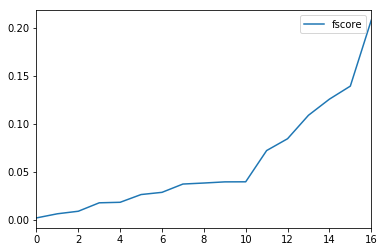

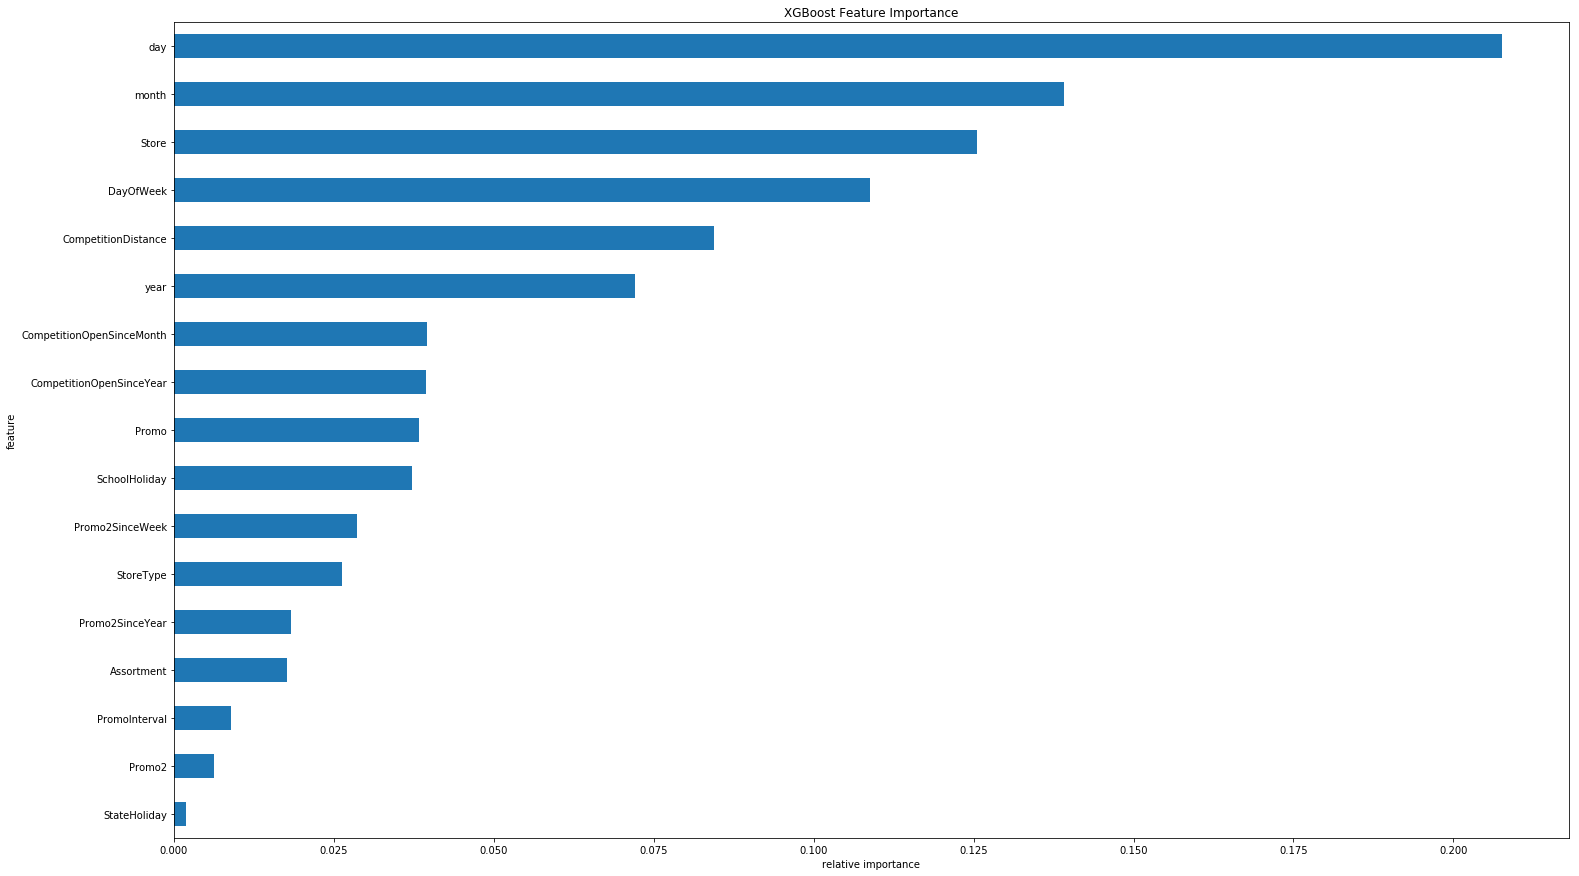

In [53]:
print("=> 使用XGBoost建模...")
XGB_native(train,test,features,features_non_numeric)